In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic


import warnings
warnings.filterwarnings('ignore')

# https://www.kaggle.com/datasets/saurabhbadole/zomato-delivery-operations-analytics-dataset/data

In [ ]:
df = pd.read_csv("ZomatoDataset.csv")

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [ ]:
#Clean Column Names for Easier Access
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [ ]:
df.head().T

,0,1,2,3,4
id,0xcdcd,0xd987,0x2784,0xc8b6,0xdb64
delivery_person_id,DEHRES17DEL01,KOCRES16DEL01,PUNERES13DEL03,LUDHRES15DEL02,KNPRES14DEL02
delivery_person_age,36.0,21.0,23.0,34.0,24.0
delivery_person_ratings,4.2,4.7,4.7,4.3,4.7
restaurant_latitude,30.327968,10.003064,18.56245,30.899584,26.463504
restaurant_longitude,78.046106,76.307589,73.916619,75.809346,80.372929
delivery_location_latitude,30.397968,10.043064,18.65245,30.919584,26.593504
delivery_location_longitude,78.116106,76.347589,74.006619,75.829346,80.502929
order_date,12-02-2022,13-02-2022,04-03-2022,13-02-2022,14-02-2022
time_orderd,21:55,14:55,17:30,09:20,19:50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45584 non-null  object 
 1   delivery_person_id           45584 non-null  object 
 2   delivery_person_age          43730 non-null  float64
 3   delivery_person_ratings      43676 non-null  float64
 4   restaurant_latitude          45584 non-null  float64
 5   restaurant_longitude         45584 non-null  float64
 6   delivery_location_latitude   45584 non-null  float64
 7   delivery_location_longitude  45584 non-null  float64
 8   order_date                   45584 non-null  object 
 9   time_orderd                  43853 non-null  object 
 10  time_order_picked            45584 non-null  object 
 11  weather_conditions           44968 non-null  object 
 12  road_traffic_density         44983 non-null  object 
 13  vehicle_conditio

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,vehicle_condition,multiple_deliveries,time_taken_(min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,45584,45584,0xcdcd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_person_id,45584,1320,JAPRES11DEL02,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_person_age,43730.0,NaN,NaN,NaN,29.566911,5.815064,15.0,25.0,30.0,35.0,50.0
delivery_person_ratings,43676.0,NaN,NaN,NaN,4.633774,0.334744,1.0,4.5,4.7,4.9,6.0
restaurant_latitude,45584.0,NaN,NaN,NaN,17.017948,8.185674,-30.905562,12.933284,18.55144,22.728163,30.914057
restaurant_longitude,45584.0,NaN,NaN,NaN,70.229684,22.885575,-88.366217,73.17,75.897963,78.044095,88.433452
delivery_location_latitude,45584.0,NaN,NaN,NaN,17.46548,7.335562,0.01,12.988453,18.633934,22.785049,31.054057
delivery_location_longitude,45584.0,NaN,NaN,NaN,70.844161,21.120578,0.01,73.28,76.002574,78.107044,88.563452
order_date,45584,44,15-03-2022,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_orderd,43853,176,21:55,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken_(min)                  0
dtype: int64

In [ ]:
# !pip install missingno

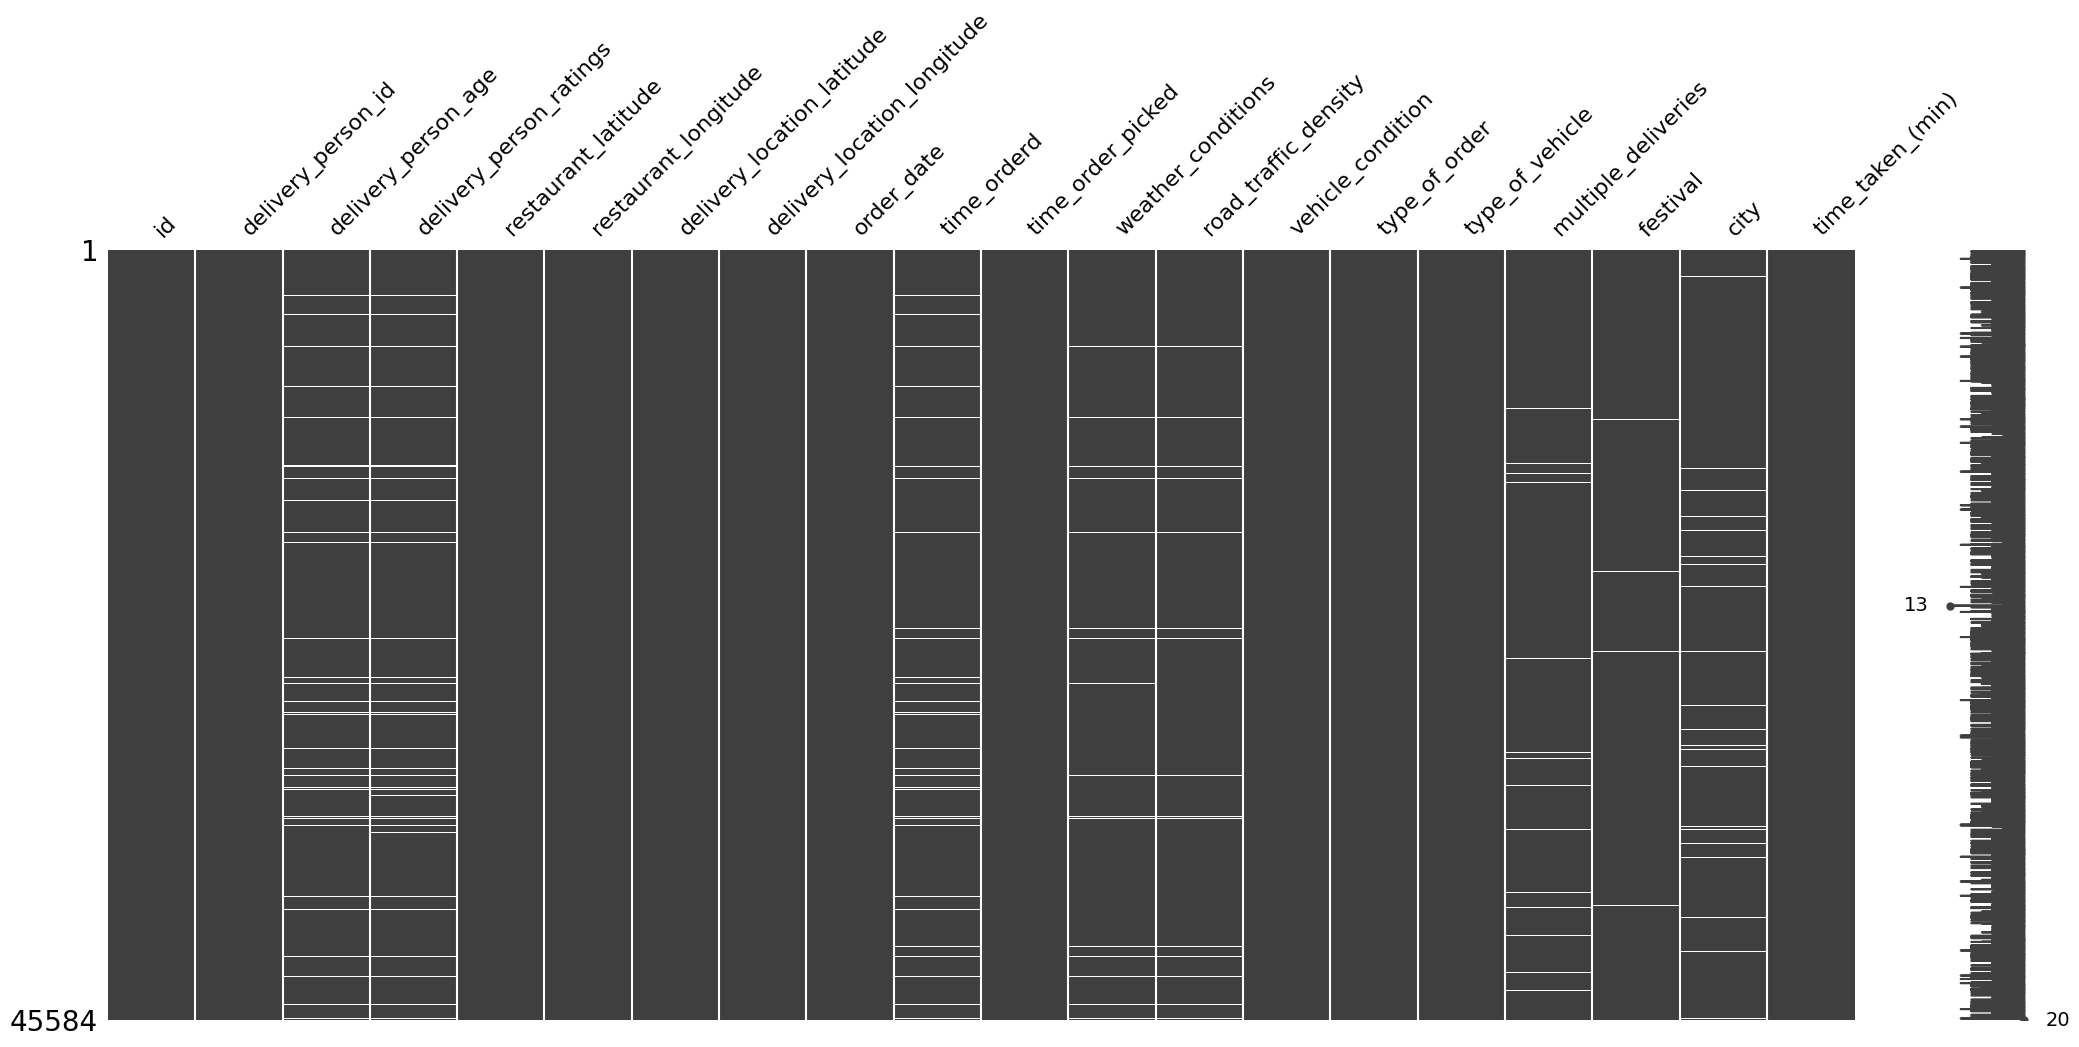

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
# Null summary
null_percent = df.isnull().mean() * 100
print(null_percent[null_percent > 0].sort_values(ascending=False))

delivery_person_ratings    4.185679
delivery_person_age        4.067217
time_orderd                3.797385
city                       2.632503
multiple_deliveries        2.178396
weather_conditions         1.351351
road_traffic_density       1.318445
festival                   0.500176
dtype: float64


In [ ]:
#Convert and Clean Data Types
# Convert to numeric
df['delivery_person_age'] = pd.to_numeric(df['delivery_person_age'], errors='coerce')
df['delivery_person_ratings'] = pd.to_numeric(df['delivery_person_ratings'], errors='coerce')
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')
df['time_taken_(min)'] = df['time_taken_(min)'].astype(float)

# Convert date and time
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['time_orderd'] = pd.to_datetime(df['time_orderd'], errors='coerce').dt.time
df['time_order_picked'] = pd.to_datetime(df['time_order_picked'], errors='coerce').dt.time

In [ ]:
# Null summary
null_percent = df.isnull().mean() * 100
print(null_percent[null_percent > 0].sort_values(ascending=False))

order_date                 53.929010
time_orderd                12.721569
time_order_picked          10.984117
delivery_person_ratings     4.185679
delivery_person_age         4.067217
city                        2.632503
multiple_deliveries         2.178396
weather_conditions          1.351351
road_traffic_density        1.318445
festival                    0.500176
dtype: float64


In [ ]:
#Handle Missing Values
df['delivery_person_age'].fillna(df['delivery_person_age'].median(), inplace=True)
df['delivery_person_ratings'].fillna(df['delivery_person_ratings'].mean(), inplace=True)
df['multiple_deliveries'].fillna(0, inplace=True)
df['festival'].fillna('No', inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)


In [ ]:
# Null summary
null_percent = df.isnull().mean() * 100
print(null_percent[null_percent > 0].sort_values(ascending=False))

order_date              53.929010
time_orderd             12.721569
time_order_picked       10.984117
weather_conditions       1.351351
road_traffic_density     1.318445
dtype: float64


In [ ]:
if df['order_date'].isnull().mean() > 0.5:
    df.drop(columns='order_date', inplace=True)
else:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df['order_date'].fillna(df['order_date'].mode()[0], inplace=True)

In [ ]:
df['time_orderd'] = df['time_orderd'].replace(['NaN ', 'NaN'], pd.NA)
df['time_order_picked'] = df['time_order_picked'].replace(['NaN ', 'NaN'], pd.NA)


df['time_orderd'] = pd.to_datetime('2025-01-01 ' + df['time_orderd'].astype(str), errors='coerce')
df['time_order_picked'] = pd.to_datetime('2025-01-01 ' + df['time_order_picked'].astype(str), errors='coerce')


median_time_orderd = df['time_orderd'].median()
median_time_picked = df['time_order_picked'].median()

df['time_orderd'].fillna(median_time_orderd, inplace=True)
df['time_order_picked'].fillna(median_time_picked, inplace=True)


for col in ['weather_conditions', 'road_traffic_density']:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)


# Null summary
null_percent = df.isnull().mean() * 100
print(null_percent[null_percent > 0].sort_values(ascending=False))

Series([], dtype: float64)


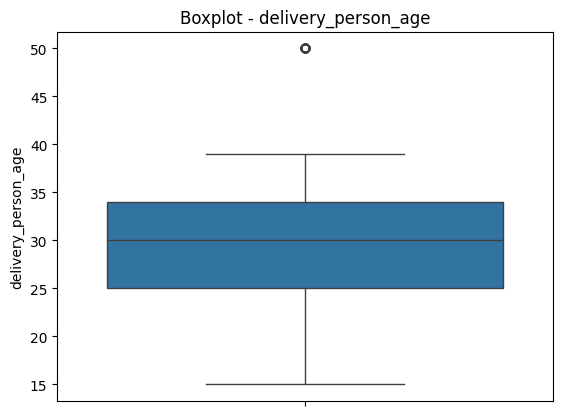

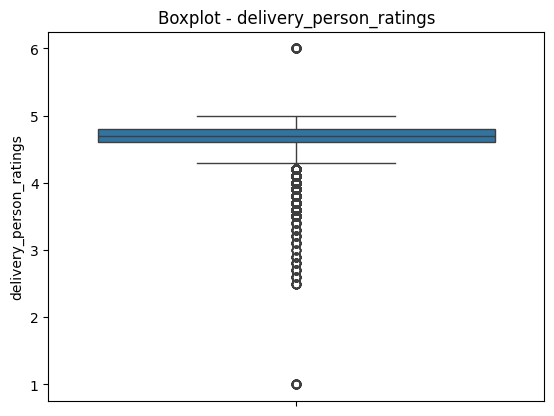

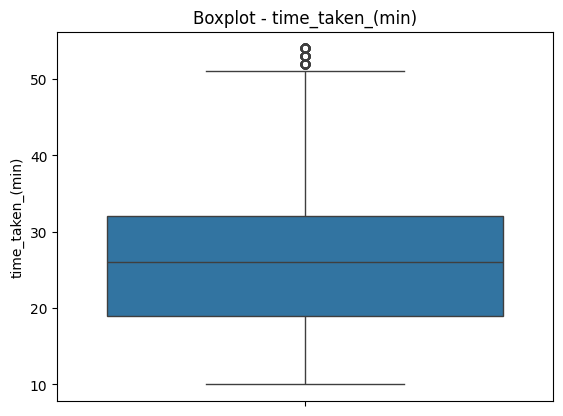

In [ ]:
#Outlier Detection & Removal
from scipy import stats
numeric_cols = ['delivery_person_age', 'delivery_person_ratings', 'time_taken_(min)']

for col in numeric_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

# Remove extreme outliers using Z-score
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]


In [ ]:
#Feature Engineering

# Convert lat/lon to float
df['restaurant_latitude'] = pd.to_numeric(df['restaurant_latitude'], errors='coerce')
df['restaurant_longitude'] = pd.to_numeric(df['restaurant_longitude'], errors='coerce')
df['delivery_location_latitude'] = pd.to_numeric(df['delivery_location_latitude'], errors='coerce')
df['delivery_location_longitude'] = pd.to_numeric(df['delivery_location_longitude'], errors='coerce')

# Distance in KM
def calc_distance(row):
    try:
        return geodesic(
            (row['restaurant_latitude'], row['restaurant_longitude']),
            (row['delivery_location_latitude'], row['delivery_location_longitude'])
        ).km
    except:
        return np.nan

df['distance_km'] = df.apply(calc_distance, axis=1)

In [ ]:
df['distance_km']

0        10.271464
1         6.229376
2        13.764306
3         2.927795
4        19.373484
           ...    
45579     1.488112
45580    10.983242
45581     4.648024
45582     6.219668
45583    12.057294
Name: distance_km, Length: 44814, dtype: float64

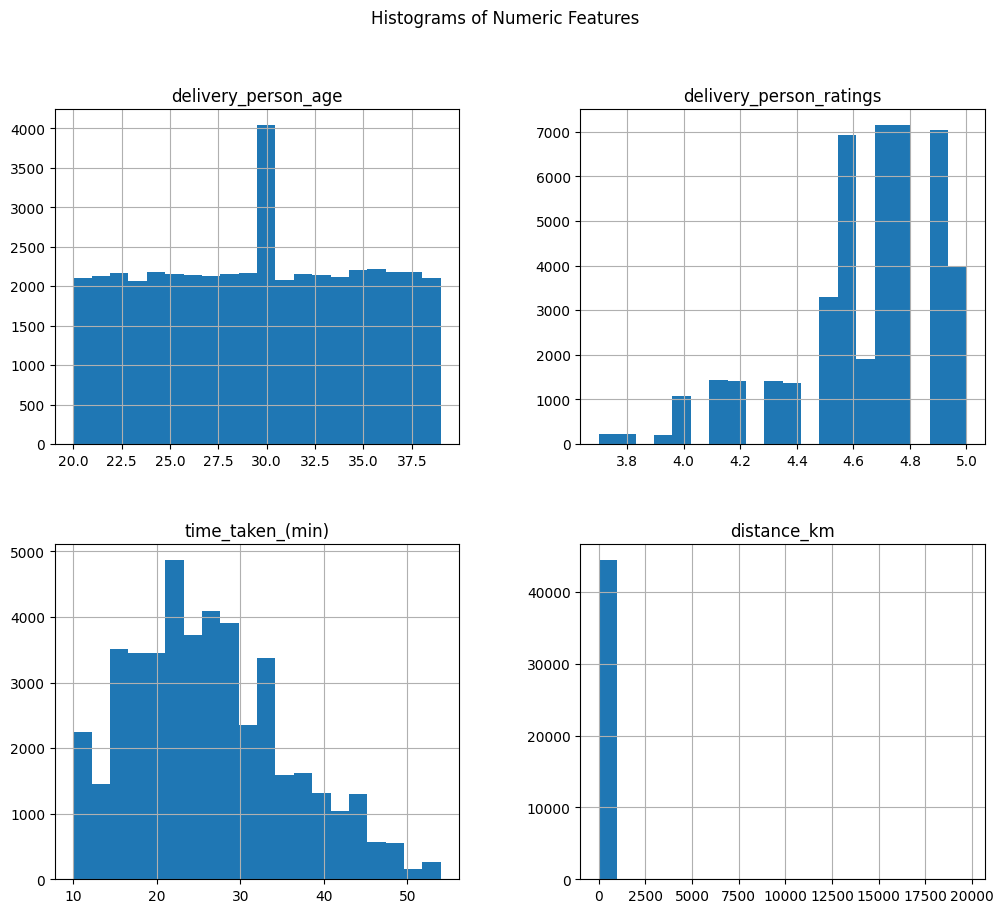

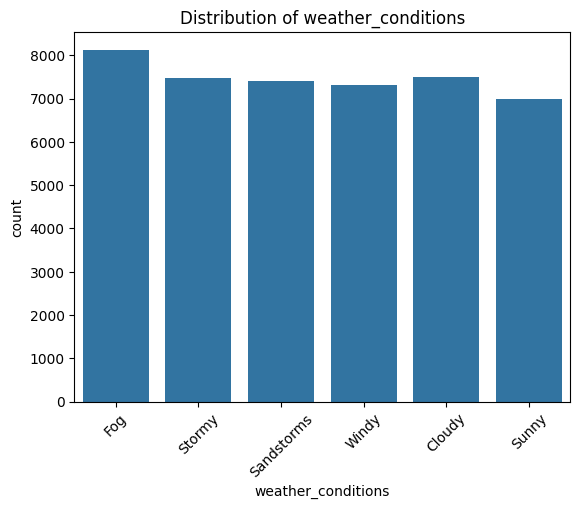

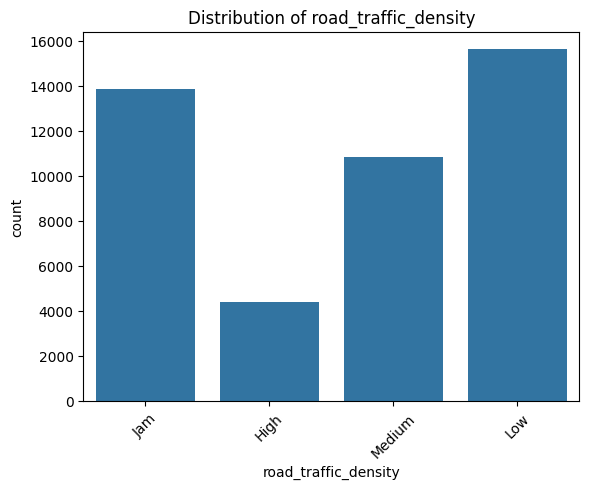

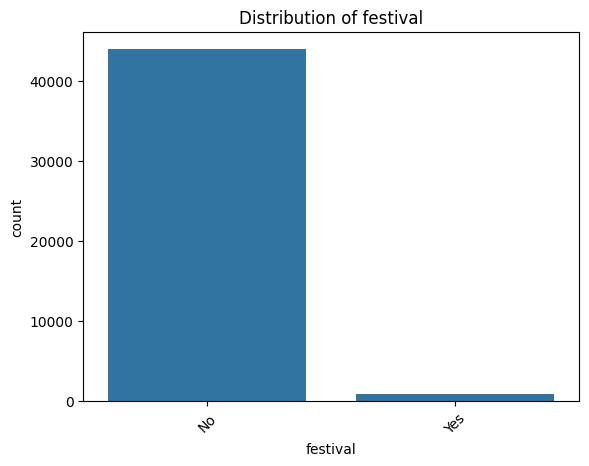

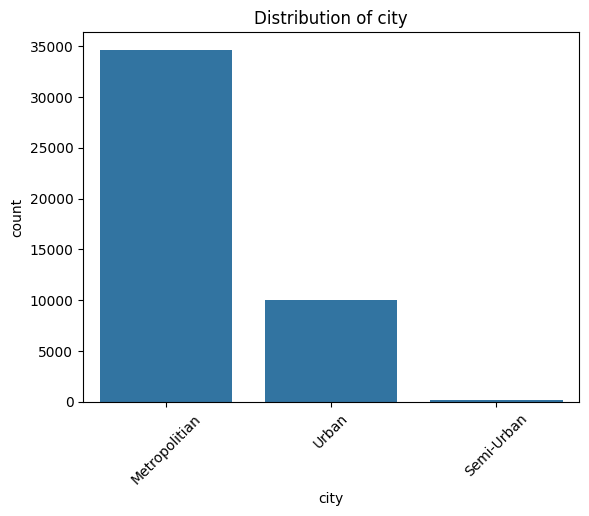

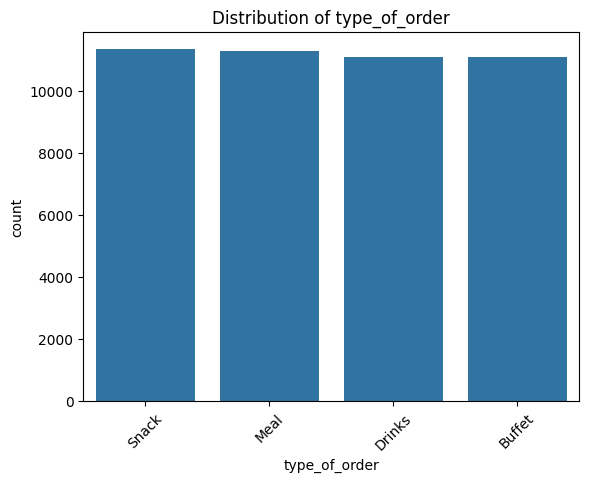

In [ ]:
#Univariate Analysis >> distribution of features

#numeric
df[numeric_cols + ['distance_km']].hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

#categorical
categorical_cols = ['weather_conditions', 'road_traffic_density', 'festival', 'city', 'type_of_order']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

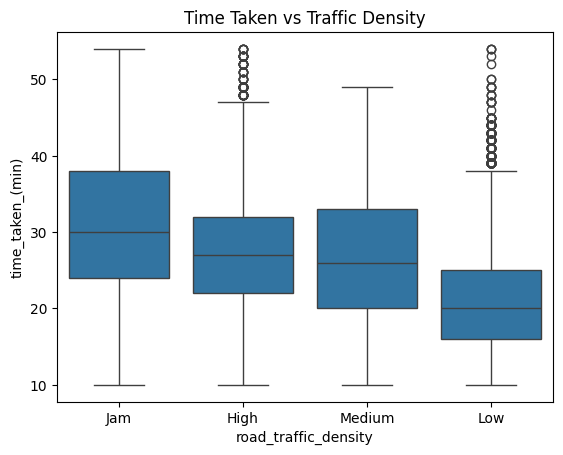

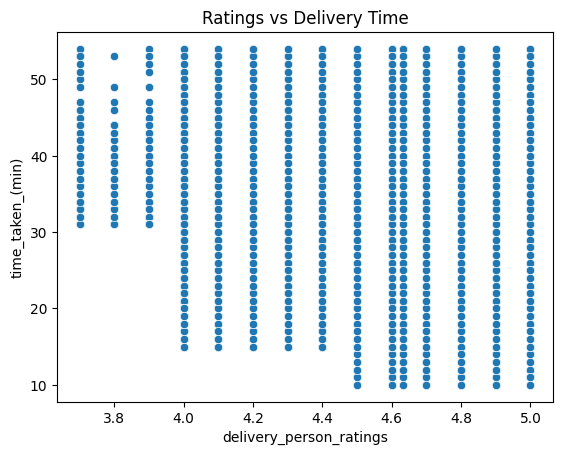

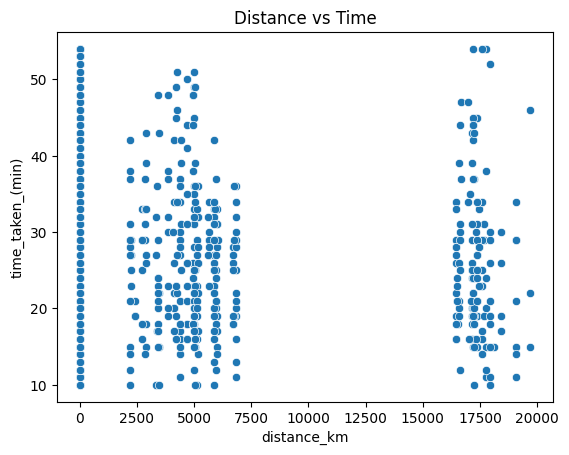

In [ ]:
#Bivariate Analysis

# Delivery time vs traffic
sns.boxplot(x='road_traffic_density', y='time_taken_(min)', data=df)
plt.title('Time Taken vs Traffic Density')
plt.show()

# Ratings vs Time
sns.scatterplot(x='delivery_person_ratings', y='time_taken_(min)', data=df)
plt.title('Ratings vs Delivery Time')
plt.show()

# Distance vs Time
sns.scatterplot(x='distance_km', y='time_taken_(min)', data=df)
plt.title('Distance vs Time')
plt.show()


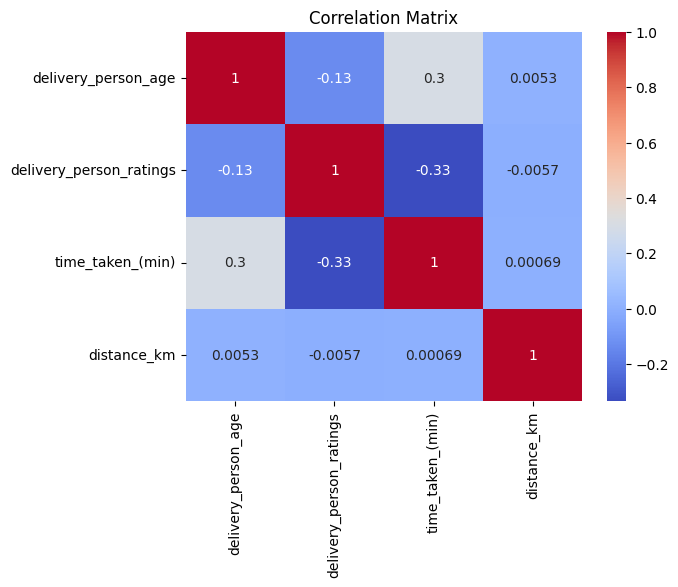

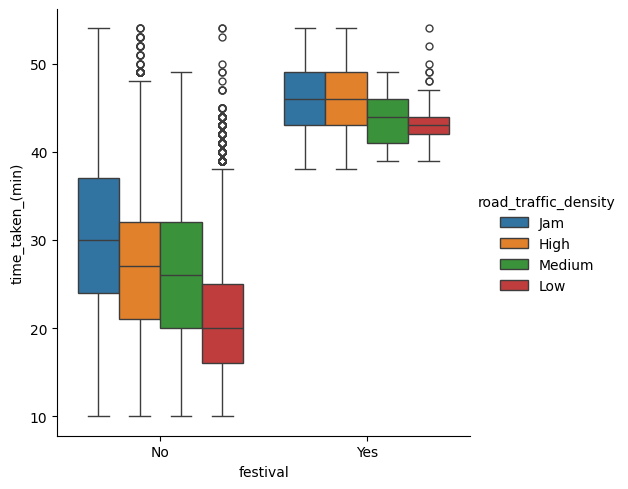

In [ ]:
#Multivariate Analysis

#Heatmap
sns.heatmap(df[numeric_cols + ['distance_km']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#Festival & Traffic effect on time
sns.catplot(x='festival', y='time_taken_(min)', hue='road_traffic_density', kind='box', data=df)


In [ ]:
df.columns

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'time_orderd', 'time_order_picked',
       'weather_conditions', 'road_traffic_density', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city', 'time_taken_(min)', 'distance_km'],
      dtype='object')

In [ ]:
df['delivery_efficiency'] = df['time_taken_(min)'] / df['distance_km']

# Top 5 most efficient delivery persons per city
top_5_eff = (
    df.groupby(['city', 'delivery_person_id'])['delivery_efficiency']
    .mean()
    .reset_index()
    .sort_values(['city', 'delivery_efficiency'])
    .groupby('city')
    .head(5)
)

print(top_5_eff)


               city delivery_person_id  delivery_efficiency
446   Metropolitian      DEHRES08DEL03             1.569511
939   Metropolitian     LUDHRES14DEL01             1.630819
10    Metropolitian      AGRRES03DEL02             1.737714
437   Metropolitian      DEHRES05DEL03             1.756817
905   Metropolitian     LUDHRES01DEL03             1.962698
1419     Semi-Urban      MUMRES20DEL02             0.012027
1380     Semi-Urban      HYDRES18DEL01             0.012409
1325     Semi-Urban     AURGRES02DEL02             2.304210
1420     Semi-Urban     MYSRES010DEL02             2.330641
1443     Semi-Urban  RANCHIRES010DEL02             2.347991
2295          Urban      KOLRES04DEL03             0.003805
1940          Urban      GOARES04DEL03             0.004347
2293          Urban      KOLRES04DEL01             0.006611
1966          Urban      GOARES14DEL02             0.009538
1972          Urban      GOARES16DEL02             0.549059


In [ ]:
#Q2. What is the impact of vehicle condition on delivery efficiency across different traffic conditions?
impact_vehicle_condition = (
    df.groupby(['road_traffic_density', 'vehicle_condition'])['delivery_efficiency']
    .mean()
    .unstack()
)

print(impact_vehicle_condition)


vehicle_condition            0         1         2         3
road_traffic_density                                        
High                  9.389931  7.773154  7.929942       NaN
Jam                   3.462423  2.758050  2.745546       NaN
Low                   5.905268  4.755310  4.680979  3.323186
Medium                3.184640  2.608328  2.599853       NaN


In [ ]:
correlation = df[['delivery_person_ratings', 'delivery_efficiency']].corr()
print(correlation)


                         delivery_person_ratings  delivery_efficiency
delivery_person_ratings                  1.00000             -0.07326
delivery_efficiency                     -0.07326              1.00000


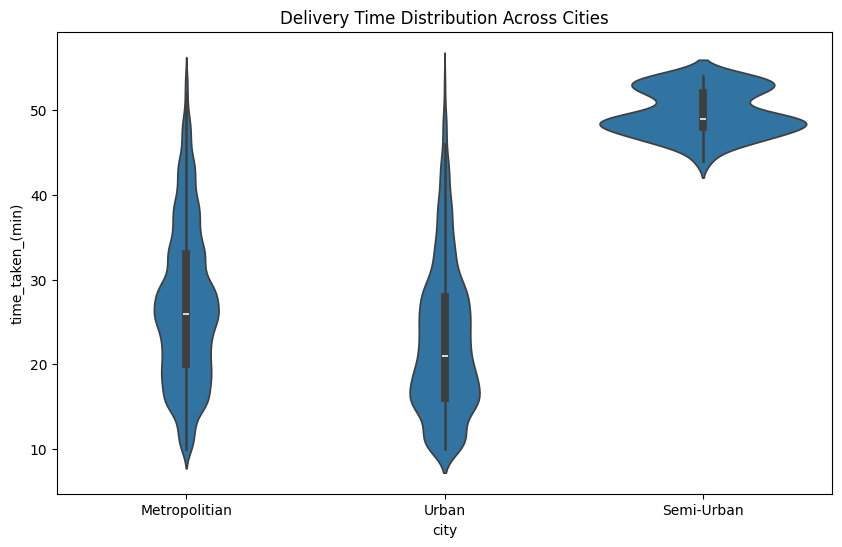

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.violinplot(x='city', y='time_taken_(min)', data=df)
plt.title('Delivery Time Distribution Across Cities')
plt.show()

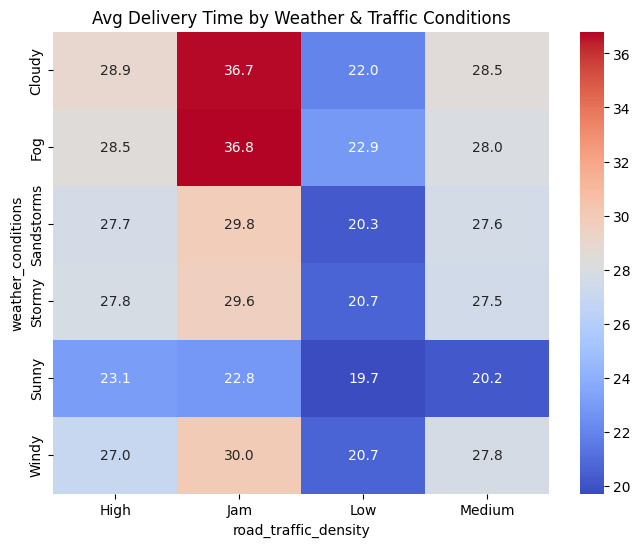

In [ ]:
pivot = pd.pivot_table(
    df,
    values='time_taken_(min)',
    index='weather_conditions',
    columns='road_traffic_density',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Avg Delivery Time by Weather & Traffic Conditions')
plt.show()


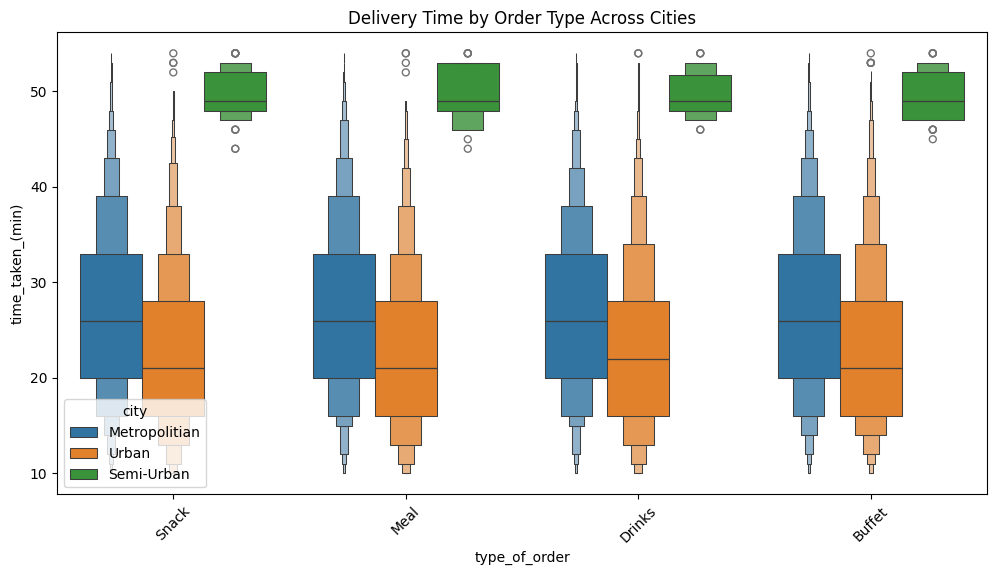

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='type_of_order', y='time_taken_(min)', hue='city', data=df)
plt.title('Delivery Time by Order Type Across Cities')
plt.xticks(rotation=45)
plt.show()

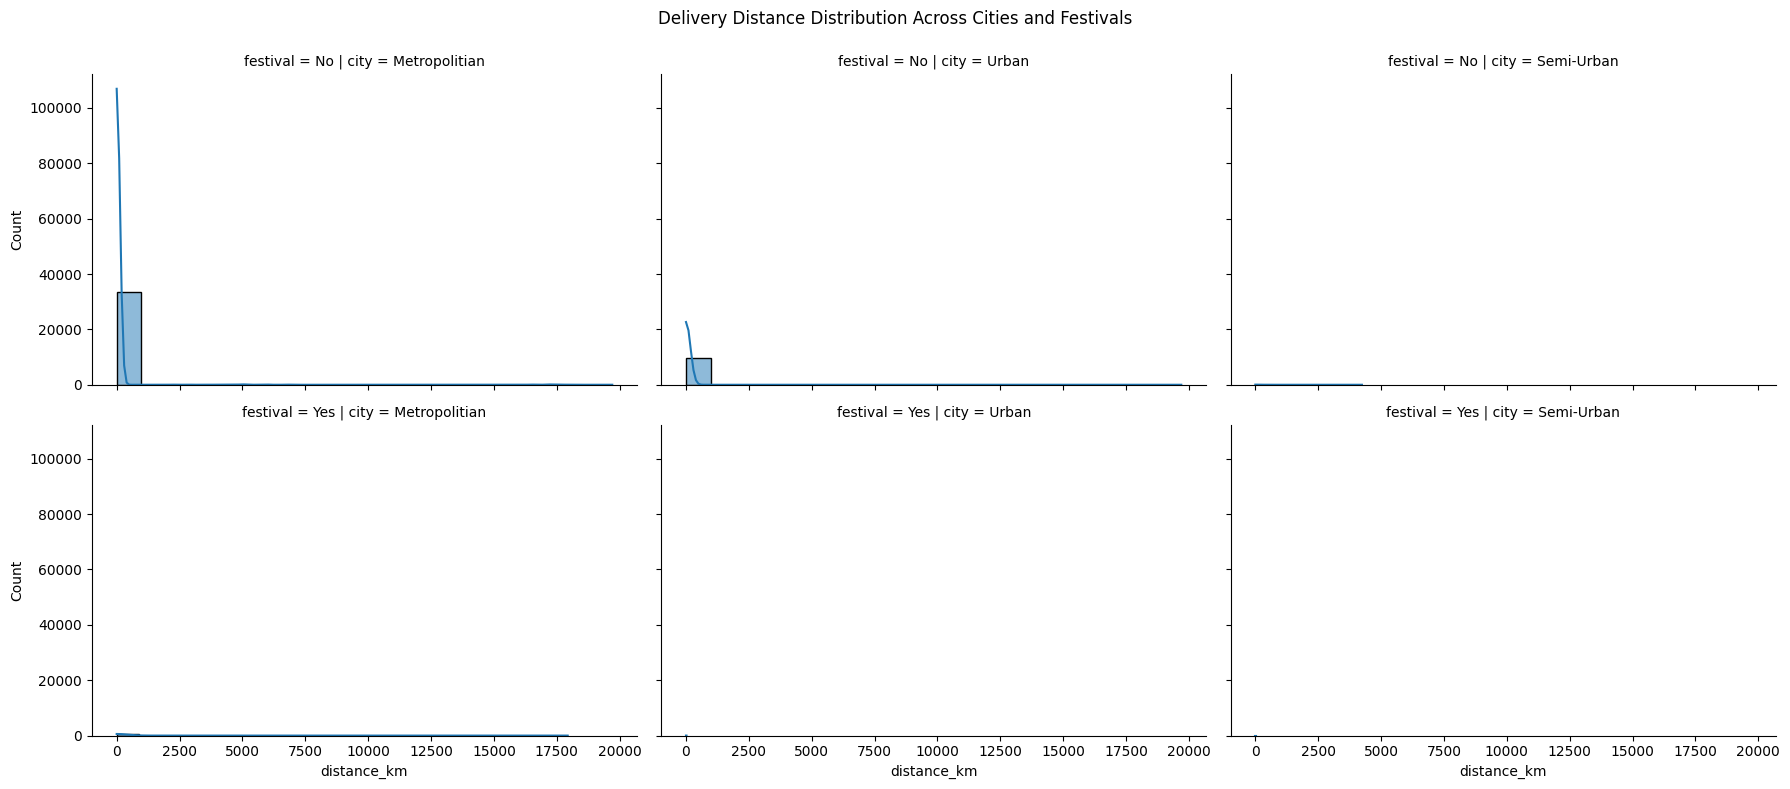

In [ ]:
g = sns.FacetGrid(df, col='city', row='festival', height=4, aspect=1.5)
g.map(sns.histplot, 'distance_km', bins=20, kde=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Delivery Distance Distribution Across Cities and Festivals')
plt.show()

In [ ]:
# Convert object columns with few unique values to 'category' type
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() < 50:
        df[col] = df[col].astype('category')

# Drop columns with all NaNs or zero variance (optional but helps profiling)
df.dropna(axis=1, how='all', inplace=True)
df = df.loc[:, df.nunique() > 1]


from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings

custom_config = Settings()
custom_config.vars.num.chi_squared_threshold = 0.0  # Disables chi-squared test

profile = ProfileReport(df, title="Zomato Dataset EDA Report", config=custom_config)
profile.to_file("zomato_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 18.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]